In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import OrderedDict

In [2]:
# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='outer', on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

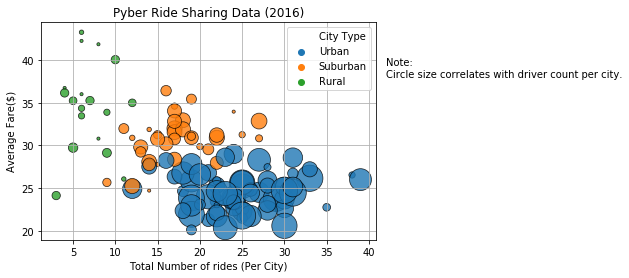

In [3]:
# Obtain the x and y coordinates for each of the three city types
city_df_new_index = city_df.set_index('city')
combined_df_grp_city = combined_df.groupby('city')

#Create a new dict for saving all the data we need and then create a pd.DataFrame
analysis_data = OrderedDict()
analysis_data['Average Fare'] = combined_df_grp_city['fare'].mean()
analysis_data['Total Rides']  = combined_df_grp_city['ride_id'].count()
analysis_data['City Type']    = city_df_new_index['type']
analysis_data['Driver Count'] = city_df_new_index['driver_count']
analysis_df = pd.DataFrame(analysis_data)
analysis_df.head()


# Build the scatter plots for each city types
sns.scatterplot(analysis_df['Total Rides'], analysis_df['Average Fare'], marker="o", edgecolor="black", hue=analysis_df['City Type'], s= 10*analysis_df['Driver Count'], alpha=0.8)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend - Automatically done with sns.scatterplot
# Incorporate a text label regarding circle size
# https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/
plt.text(42, 38, "Note:\nCircle size correlates with driver count per city.", size='medium', color='black')

# Save Figure
plt.savefig("Pyber Ride Sharing data (2016).png")

# Show plot
plt.show()

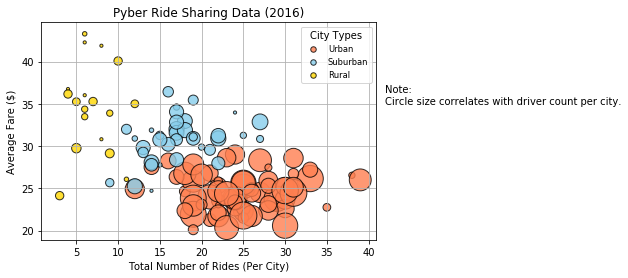

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

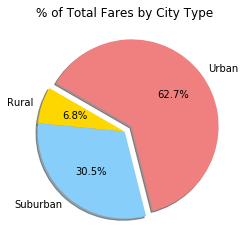

In [4]:
# Calculate Type Percents
combined_df_grp_type = combined_df.groupby('type')
fare_total_by_type = combined_df_grp_type['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_total_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Total Fares by City Type.png")

# Show Figure
plt.show()

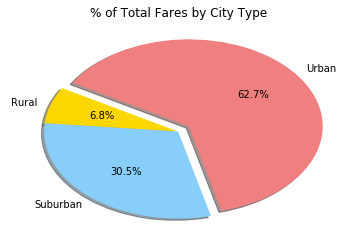

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

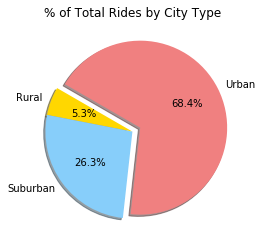

In [5]:
# Calculate Ride Percents
rides_total_by_type = combined_df_grp_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_total_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total Rides by City Type.png")

# Show Figure
plt.show()

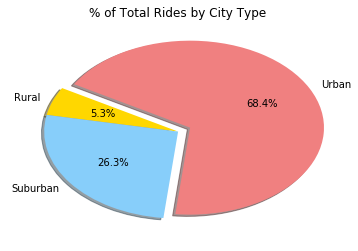

## Total Drivers by City Type

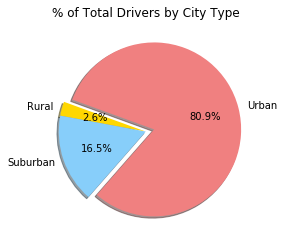

In [6]:
# Calculate Driver Percents
city_df_grp_type = city_df.groupby('type')
drivers_total_by_type = city_df_grp_type['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_total_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total Drivers by City Type.png")

# Show Figure
plt.show()

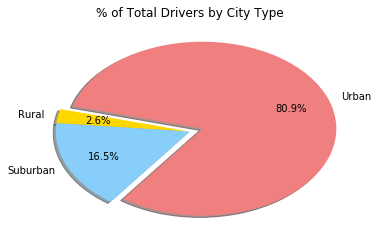